# Exercise 8 Part 2 

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [46]:
def analyze_patient_data(file_path):
    # 1. Read the data
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return

    # 2. Handle missing values
    # Drop rows with any missing values for simplicity.
    # A more advanced approach could be imputation.
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)


    # 3. Encode the categorical target variable 'Ailment'
    le = LabelEncoder()
    df['Ailment'] = le.fit_transform(df['Ailment'])

    # Separate features (X) and target (y)
    X = df.drop('Ailment', axis=1)
    y = df['Ailment']

    print(" cleaned data ")
    # print(X.head(5))
    print(' y data \n' , y.head(5,))
    print(' y data \n' , y.describe)

    # 4. Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 5. Build and train a classification model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # 6. Make predictions on the test set
    y_pred = model.predict(X_test)

    # 7. Calculate and print classification metrics
    print("Classification Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")
    
    print(f"Precision (micro): {precision_score(y_test, y_pred, average='micro'):.4f}")
    print(f"Recall (micro): {recall_score(y_test, y_pred, average='micro'):.4f}")
    print(f"F1-score (micro): {f1_score(y_test, y_pred, average='micro'):.4f}")
    
    print("Note: 'macro' calculates metrics for each label, and finds their unweighted mean. 'micro' calculates metrics globally by counting the total true positives, false negatives and false positives.")

file_path = 'patient-data.csv'
analyze_patient_data(file_path)



 cleaned data 
 y data 
 0    2
1    1
2    4
3    0
4    4
Name: Ailment, dtype: int64
 y data 
 <bound method NDFrame.describe of 0       2
1       1
2       4
3       0
4       4
       ..
2362    3
2363    3
2364    3
2365    3
2366    3
Name: Ailment, Length: 2367, dtype: int64>
Classification Metrics:
Accuracy: 0.9937
Precision (macro): 0.9955
Recall (macro): 0.8750
F1-score (macro): 0.8977
Precision (micro): 0.9937
Recall (micro): 0.9937
F1-score (micro): 0.9937
Note: 'macro' calculates metrics for each label, and finds their unweighted mean. 'micro' calculates metrics globally by counting the total true positives, false negatives and false positives.


In [3]:
def analyze_data(df):
    print(f"Analyzing data with {len(df.columns)} columns")
    # Assuming the last column is the target variable
    target_col = df.columns[-1]
    X = df.iloc[:, :-1]
    y = df[target_col]

    # Check if the target is categorical or continuous
    if y.dtype == 'object' or y.nunique() < 20: # Heuristic for classification
        print("--- Classification Analysis ---")
        le = LabelEncoder()
        y = le.fit_transform(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    else: # Regression
        print("--- Regression Analysis ---")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")

def anaylze_excel_data(file_path):
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        print(f"\n----- Analyzing Sheet: {sheet_name} -----")
        df = pd.read_excel(xls, sheet_name=sheet_name)
        analyze_data(df)

# anaylze_excel_data('curse-of-dimensionality.xlsx')


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# 1. Read the data
try:
    df = pd.read_csv('patient-data.csv')
except FileNotFoundError:
    print(f"Error: The file 'patient-data.csv' was not found.")

if 'df' in locals():
    # Identify missing data
    # print("Missing values per column:")
    # print(df.isnull().sum())

    # Remove rows with any missing data
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    # Separate features (X) and target (y)
    X = df.drop('Ailment', axis=1)
    y = df['Ailment']

    # Encode the categorical target variable 'Ailment'
    le = LabelEncoder()
    y = le.fit_transform(y)

    test_sizes = [0.8, 0.5, 0.2]
    results = []

    for test_size in test_sizes:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

        # Build and train a model
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        results.append({
            'Test Size': test_size,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision (weighted)': precision_score(y_test, y_pred, average='weighted'),
            'Recall (weighted)': recall_score(y_test, y_pred, average='weighted'),
            'F1-score (weighted)': f1_score(y_test, y_pred, average='weighted')
        })

    results_df = pd.DataFrame(results)
    # print("\nModel performance with different test sizes:")
    # print(results_df.to_string())


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



----- Analyzing Sheet: Sheet1 -----

--- Regression Analysis ---
   Test Size   R2 Score       MAE
0       0.80 -10.137187  0.634521
1       0.50  -0.515645  0.214733
2       0.25   0.083116  0.146150

--- Test vs Actual Data ---


TypeError: 'Text' object is not callable

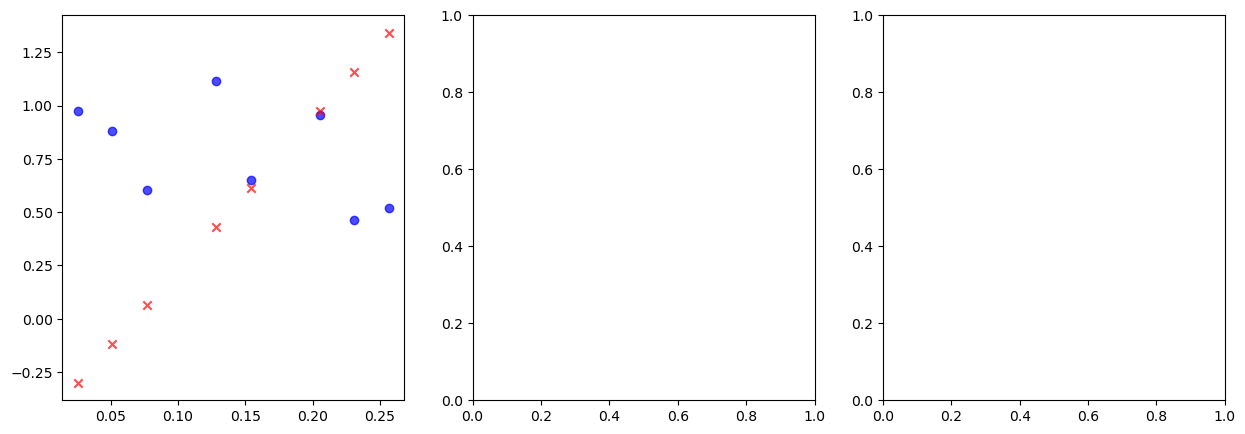

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def analyze_excel_file(file_path):
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        print(f'\n----- Analyzing Sheet: {sheet_name} -----')
        df = pd.read_excel(xls, sheet_name=sheet_name)
        
        target_col = 'y'
        X = df.drop(target_col, axis=1)
        y = df[target_col]

        # is_classification = y.dtype == 'object' or y.nunique() < 20
        is_classification = False # Try to force linear regression.

        test_sizes = [0.8, 0.5, 0.25]
        # test_sizes = [0.5]
        results = []
        test_predict_data_for_each_propotion = {}
        if is_classification:
            le = LabelEncoder()
            y_encoded = le.fit_transform(y)
            print('\n--- Classification Analysis ---')
            for test_size in test_sizes:
                X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_size, random_state=42)
                model = LogisticRegression(max_iter=1000, solver='liblinear')
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                results.append({
                    'Test Size': test_size,
                    'Accuracy': accuracy_score(y_test, y_pred),
                    'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
                    'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
                    'F1-score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
                })
            results_df = pd.DataFrame(results)
            print(results_df.to_string())
        else:
            print('\n--- Regression Analysis ---')
            for test_size in test_sizes:
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
                model = LinearRegression()
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                results.append({
                    'Test Size': test_size,
                    'R2 Score': r2_score(y_test, y_pred),
                    'MAE': mean_absolute_error(y_test, y_pred)
                })
                test_predict_data_for_each_propotion[test_size] = {"x_test": X_test,
                                                                   "y_test": y_test,
                                                                   "y_predict": y_pred};
            results_df = pd.DataFrame(results)
            print(results_df.to_string())

        # Plotting
        print('\n--- Test vs Actual Data ---')

        i=0
        fig, axes = plt.subplots(1,3,figsize=(15,5))
        for test_size,value in test_predict_data_for_each_propotion.items():
            train_test_values = test_predict_data_for_each_propotion[test_size];
            for col in X.columns:
                axes[i].scatter(train_test_values["x_test"], train_test_values["y_test"], alpha=0.7, label='Actual', color='blue')
                axes[i].scatter(train_test_values["x_test"], train_test_values["y_predict"], alpha=0.7, label='Predicted', color='red', marker='x')
                axes[i].title(f'{col} vs {target_col} for sample size {test_size}')
                axes[i].xlabel(col)
                axes[i].ylabel(target_col)
                axes[i].legend()
            i=i+1

        plt.tight_layout()
        plt.show()

        break

analyze_excel_file('curse-of-dimensionality.xlsx')


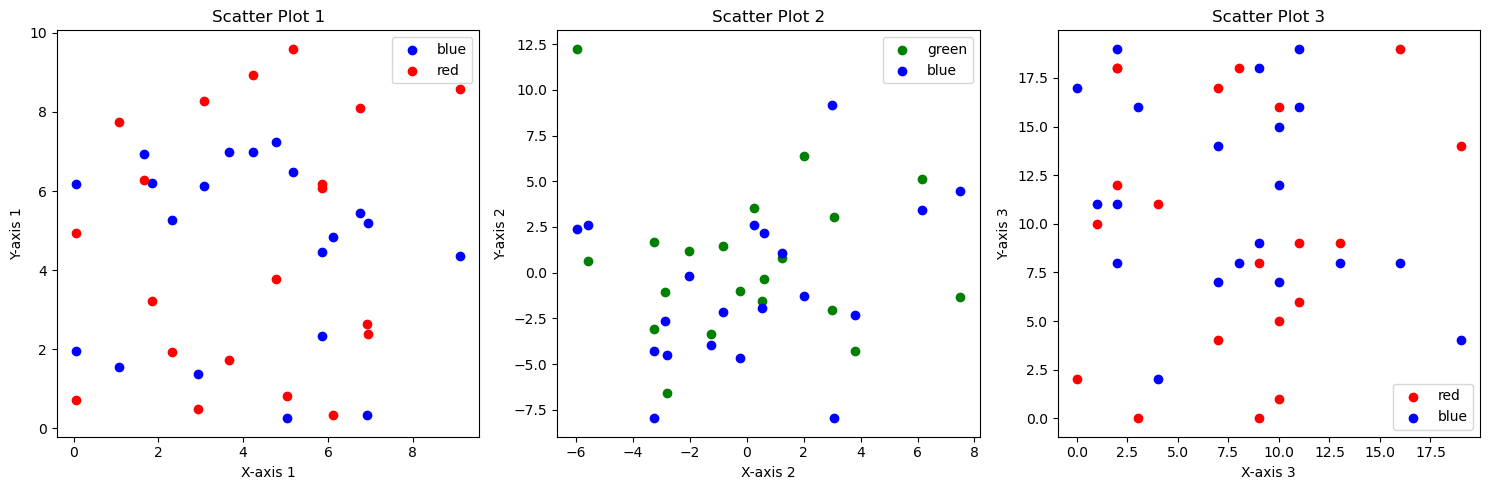

In [29]:
# create 1 by 3 
import matplotlib.pyplot as plt
import numpy as np

# Set the number of data points for each scatter plot
num_points = 20

# Create a figure and a set of subplots
# 1 row, 3 columns, and a specific figure size for better visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

# Generate and plot the first scatter plot
x1 = np.random.rand(num_points) * 10 # Random x-coordinates scaled to 0-10
y1 = np.random.rand(num_points) * 10 # Random y-coordinates scaled to 0-10
y11 = np.random.rand(num_points) * 10 # Random y-coordinates scaled to 0-10
axes[0].scatter(x1, y1, color='blue', label="blue")
axes[0].scatter(x1, y11, color='red', label="red")
axes[0].set_title('Scatter Plot 1')
axes[0].set_xlabel('X-axis 1')
axes[0].set_ylabel('Y-axis 1')
axes[0].legend()

# Generate and plot the second scatter plot
x2 = np.random.randn(num_points) * 5 # Random x-coordinates from a normal distribution
y2 = np.random.randn(num_points) * 5 # Random y-coordinates from a normal distribution
y22 = np.random.randn(num_points) * 5 # Random y-coordinates from a normal distribution
axes[1].scatter(x2, y2, color='green', label="green")
axes[1].scatter(x2, y22, color='blue', label="blue")
axes[1].set_title('Scatter Plot 2')
axes[1].set_xlabel('X-axis 2')
axes[1].set_ylabel('Y-axis 2')
axes[1].legend()

# Generate and plot the third scatter plot
x3 = np.random.randint(0, 20, num_points) # Random integer x-coordinates from 0-19
y3 = np.random.randint(0, 20, num_points) # Random integer y-coordinates from 0-19
yy3 = np.random.randint(0, 20, num_points) # New 'yy' data
axes[2].scatter(x3, y3, color='red', label="red")
axes[2].scatter(x3, yy3, color='blue', label="blue")
axes[2].set_title('Scatter Plot 3')
axes[2].set_xlabel('X-axis 3')
axes[2].set_ylabel('Y-axis 3')
axes[2].legend()

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()